## FINDING REALTION BETWEEN IRCTC(STOCK) AND SENSEX(BSE) [MONTHLY PRICE]
### Considering Open Price as value of stock/index. Data downloaded from www.bseindia.com

## Importing required liberaries 

In [75]:
import pandas as pd 
import statistics
import matplotlib.pyplot as plt
from scipy import stats 
from scipy.stats import skew,kurtosis
import warnings 
warnings.filterwarnings('ignore')

### Getting the dataset of IRCTC and SENSEX onto dataframe (monthly price) and combining them together for further analysis

In [78]:
stock_monthly = pd.read_csv(r"C:\Users\91886\Downloads\stock_monthly_bse.csv")
sensex_monthly=pd.read_csv(r"C:\Users\91886\Downloads\sensex_monthly.csv")
stock_monthly = stock_monthly.rename(columns={'Open Price': 'Open'})
monthly=pd.merge(stock_monthly,sensex_monthly,on ="Month")
monthly = monthly.rename(columns={'Open_x': 'IRCTC', 'Open_y': 'SENSEX'})
print("Correlation")
monthly.corr()

Correlation


,IRCTC,SENSEX
IRCTC,1.000000,-0.266199
SENSEX,-0.266199,1.000000


### Repeating same procedure for daily price of IRCTC and SENSEX 

In [81]:
stock_daily = pd.read_csv(r"C:\Users\91886\Downloads\stock_daily_bse.csv")
stock_daily = stock_daily.rename(columns={'Open Price': 'Open'})
stock_daily['Date'] = pd.to_datetime(stock_daily['Date'], format='%d-%b-%y')
stock_daily = stock_daily.sort_values(by='Date')


sensex_daily=pd.read_csv(r"C:\Users\91886\Downloads\sensex_daily.csv")
sensex_daily['Date'] = pd.to_datetime(sensex_daily['Date'], format='%d-%b-%y')

daily=pd.merge(stock_daily,sensex_daily,on ="Date")
daily = daily .rename(columns={'Open_x': 'IRCTC', 'Open_y': 'SENSEX'})
print("Correlation")
daily.corr()

Correlation


,IRCTC,SENSEX
IRCTC,1.000000,-0.561404
SENSEX,-0.561404,1.000000


## Lets define some user defined functions (udf) to makes thing easier ,like function to get required statistical parameters ,required plots etc.

### 1. Below is a function that prints out mean, median, skew, kurtosis for a given Index and Stock

In [85]:
def stats_func( x , y) :
    print("Mean  of Index :" , x.mean())
    print("Median  of Index :" , x.median())
    print("Skew  of Index :" , x.skew())
    print("Kurtosis  of Index :" , x.kurtosis())
    print("\n")
    print("Mean  of Stock :" , y.mean())
    print("Median  of Stock :" , y.median())
    print("Skew  of Stock :" , y.skew())
    print("Kurtosis  of Stock :" , y.kurtosis())

In [87]:
X= daily['SENSEX']
Y= daily['IRCTC']
stats_func(X,Y)

Mean  of Index : 77950.80206185568
Median  of Index : 78981.97
Skew  of Index : -0.24390359460733838
Kurtosis  of Index : -1.3940772300313395


Mean  of Stock : 1001.0721649484536
Median  of Stock : 1004.6
Skew  of Stock : 0.28261943854766214
Kurtosis  of Stock : -0.4372442696538581


### 2. Function to plot scatter plot diagram

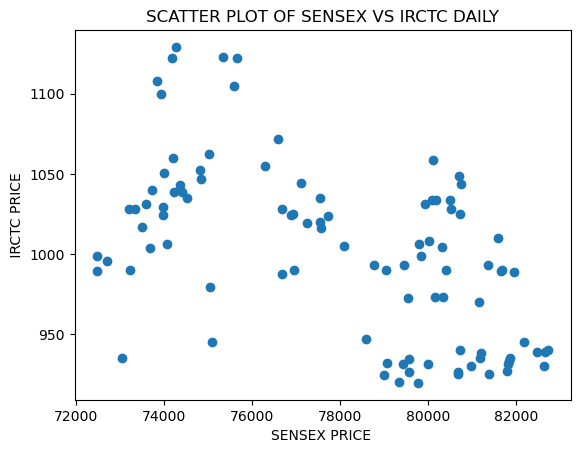

In [90]:
def scatter_plot( X,Y,period,index) :
    plt.scatter(X,Y)
    plt.title("SCATTER PLOT OF " + str(index) + " VS IRCTC " + str(period ))
    plt.xlabel(str(index) +" PRICE ")
    plt.ylabel(" IRCTC PRICE ")
    plt.show()
scatter_plot(X,Y,"DAILY","SENSEX")

### 3. Function to fit a line to given data

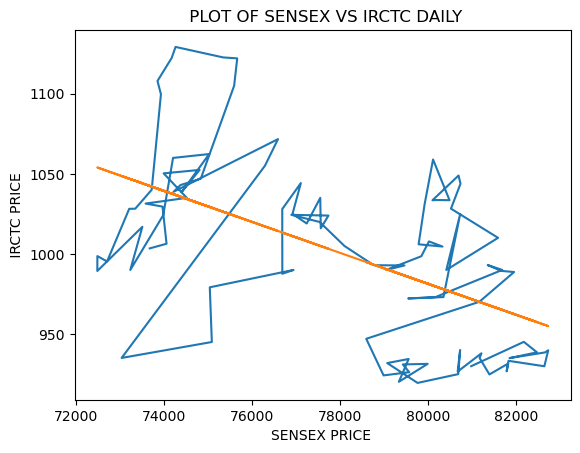

In [107]:
def fit_a_line (X,Y,period,index) :
    slope, intercept, corr, p, std_err = stats.linregress(X, Y) 
    plt.plot(X,Y)
    plt.title(" PLOT OF "+ str(index) +  " VS IRCTC " + str(period ))
    plt.xlabel(str(index) +" PRICE ")
    plt.ylabel(" IRCTC PRICE ")
    y= (slope * X) + intercept 
    plt.plot(X,y) ,"line to fit "
    plt.show()
fit_a_line(X,Y,"DAILY","SENSEX")

### 4.  Function to print estimator : slope , intercept  and error
##### error= Estimate value of y (from fitted line) - Acutal value of y(from dataset)

In [23]:
def estimator(X,Y,) :
    slope, intercept, corr, p, std_err = stats.linregress(X, Y) 
    print("Estimators for line fitted using OLS")
    print("Intercept : ",intercept)
    print("Slope : ",slope)
    y= (slope * X) + intercept 
    error=list()
    evalue= y - Y 
    print("Error values : \n ",evalue)
estimator(X,Y)

Estimators for line fitted using OLS
Intercept :  1754.3122695667666
Slope :  -0.009663019298000302
Error values : 
  0     39.021362
1     32.425933
2     10.108843
3     11.931328
4     -0.672631
        ...    
92    17.137731
93    28.487624
94    18.855097
95    15.191538
96    41.961361
Length: 97, dtype: float64


# Repeating same process on IRCTC vs SENSEX (Monthly price) , using previously defined functions 

Mean  of Index : 55666.97400000001
Median  of Index : 57793.315
Skew  of Index : -0.020019969091651532
Kurtosis  of Index : -0.5801337566723683


Mean  of Stock : 1109.0025
Median  of Stock : 914.05
Skew  of Stock : 2.237169890667571
Kurtosis  of Stock : 6.606445210675776


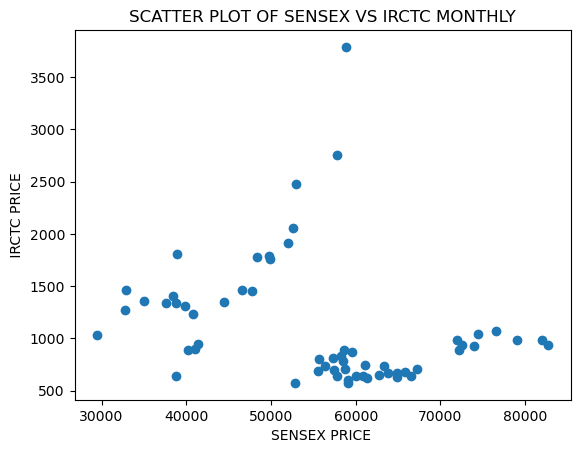

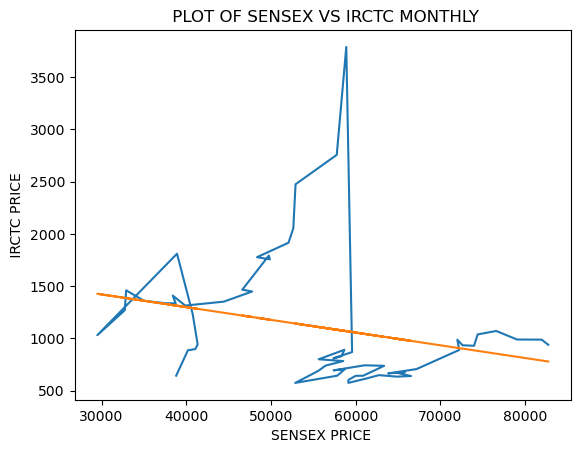

Estimators for line fitted using OLS
Intercept :  1786.0538325460457
Slope :  -0.01216253163942494
Error values : 
  0      669.983654
1      410.167859
2      388.402900
3      339.690933
4       53.391991
5     -497.201828
6      395.694323
7      117.753544
8      -74.167042
9       -0.251414
10      -7.605423
11     -21.292919
12     -91.111440
13     -13.392551
14    -106.398356
15    -244.136147
16    -247.088459
17    -611.404264
18    -576.873741
19    -579.077669
20    -762.218905
21    -907.163589
22   -1331.359659
23   -1671.496929
24   -2717.194858
25     191.440847
26     278.339867
27     246.855518
28     180.343316
29     308.460711
30     290.171977
31     359.728862
32     419.759740
33     568.101787
34     438.628549
35     365.985154
36     392.376839
37     299.841784
38     276.960275
39     402.255450
40     413.337704
41     463.254524
42     491.369228
43     422.421061
44     373.569531
45     362.231985
46     336.144358
47     324.996640
48     307.096029
4

In [26]:
X= monthly['SENSEX']
Y= monthly['IRCTC']
stats_func(X,Y)
scatter_plot( X,Y,"MONTHLY","SENSEX")
fit_a_line (X,Y,"MONTHLY","SENSEX") 
estimator(X,Y)


# Performing similar analysis of IRCTC on NSE Index ,NIFTY

## THE BELOW SEGMENT IS SIMILAR ANALYSIS FOR IRCTC(STOCK)  VS NIFTY(NSE)
### Considering PRICE  column of historical data downloaded from  https://in.investing.com/

In [30]:
stock_daily = pd.read_csv(r"C:\Users\91886\Downloads\IRCTC_DAILY.csv")
nifty_daily=pd.read_csv(r"C:\Users\91886\Downloads\NIFTY_DAILY.csv")
daily=pd.merge(stock_daily,nifty_daily,on ="Date")
daily = daily.rename(columns={'Price_x': 'IRCTC', 'Price_y': 'NIFTY'})
print("Correlation :" ,daily.corr())

Correlation :           IRCTC     NIFTY
IRCTC  1.000000 -0.550923
NIFTY -0.550923  1.000000


Mean  of Index : 23736.042268041234
Median  of Index : 24044.5
Skew  of Index : -0.22138795031315472
Kurtosis  of Index : -1.3761372513192072


Mean  of Stock : 996.1345360824743
Median  of Stock : 995.55
Skew  of Stock : 0.30661996040585604
Kurtosis  of Stock : -0.34270952610539496


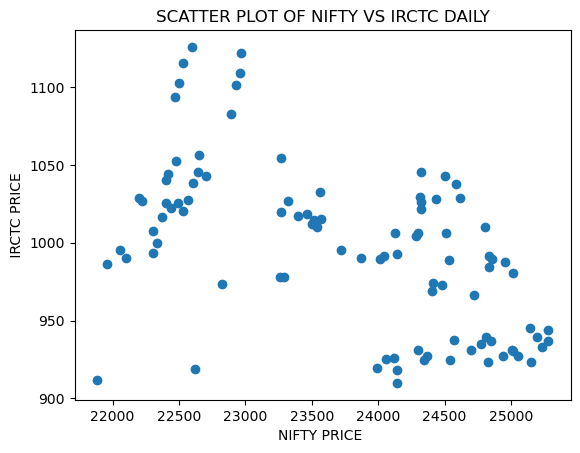

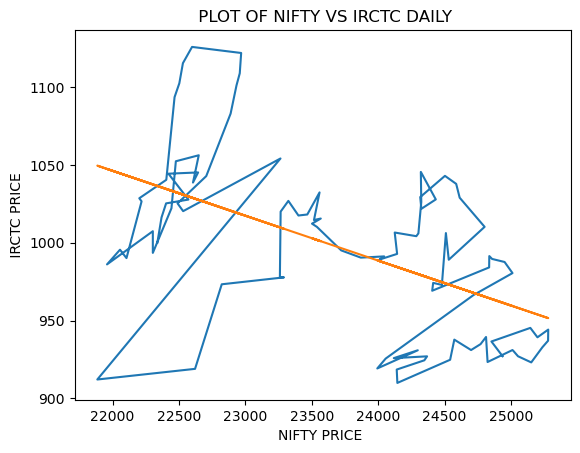

Estimators for line fitted using OLS
Intercept :  1681.8562963778704
Slope :  -0.02888947333981908
Error values : 
  0     34.456833
1     27.390772
2     10.177600
3     14.679125
4      7.384744
        ...    
92   -10.294251
93     2.010772
94     9.312759
95    19.356557
96    36.519464
Length: 97, dtype: float64


In [32]:
X= daily['NIFTY']
Y= daily['IRCTC']
stats_func(X,Y)
scatter_plot( X,Y,"DAILY","NIFTY")
fit_a_line (X,Y,"DAILY","NIFTY") 
estimator(X,Y)


In [33]:
stock_monthly = pd.read_csv(r"C:\Users\91886\Downloads\IRCTC_MONTHLY_NSE.csv")
nifty_monthly=pd.read_csv(r"C:\Users\91886\Downloads\NIFTY_MONTHLY.csv")
df=pd.merge(stock_monthly,nifty_monthly,on ="Date")
df = df.rename(columns={'Price_x': 'IRCTC', 'Price_y': 'NIFTY'})


## Converting monthly price of NIFTY VS IRCTC to quarterly price and performing analysis

In [37]:
# Initialize a new list to hold the quarterly data
quarterly_data = []

# Initialize a counter to count up to 3 months
counter = 0
sum_stock_a = 0
sum_stock_b = 0
last_date = None

# Step 2: Iterate through each row, summing up the prices every 3 rows
for index, row in df.iterrows():
    sum_stock_a += row['IRCTC']
    sum_stock_b += row['NIFTY']
    last_date = row['Date']
    
    counter += 1
    
    # If counter reaches 3, store the sum and reset for the next quarter
    if counter == 3:
        # Append the sum and last date to the new list
        quarterly_data.append({
            'Date': last_date,
            'IRCTC': sum_stock_a/3,
            'NIFTY': sum_stock_b/3
        })
        
        # Reset the sums and counter for the next quarter
        counter = 0
        sum_stock_a = 0
        sum_stock_b = 0

# Step 3: Convert the list to a DataFrame
quarterly_df = pd.DataFrame(quarterly_data)
print("Correlation :" ,quarterly_df.corr())

Correlation :           IRCTC     NIFTY
IRCTC  1.000000  0.919815
NIFTY  0.919815  1.000000


In [39]:
X=quarterly_df['NIFTY']
Y=quarterly_df['IRCTC']

Mean  of Index : 17036.501754385965
Median  of Index : 17336.3
Skew  of Index : -0.01192548118016232
Kurtosis  of Index : -0.23741323276217186


Mean  of Stock : 613.5150877192982
Median  of Stock : 664.5
Skew  of Stock : -0.14349062069346905
Kurtosis  of Stock : -1.1455961514353938


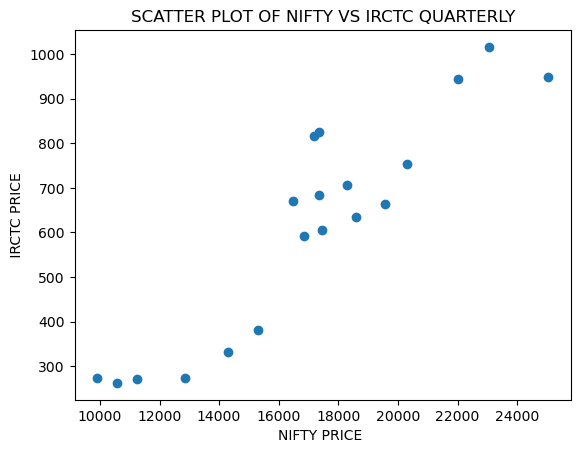

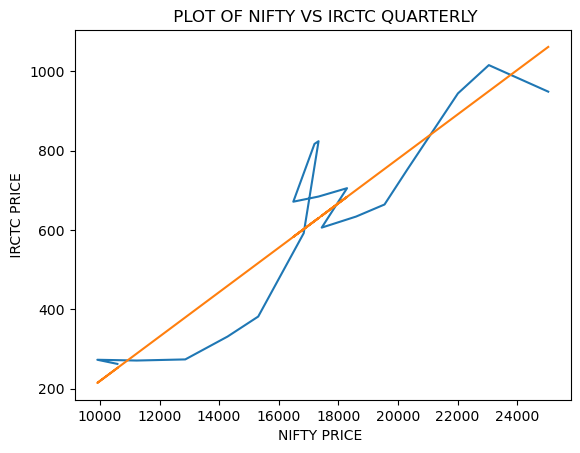

Estimators for line fitted using OLS
Intercept :  -340.9817642727704
Slope :  0.05602657551139206
Error values : 
  0     112.838117
1     -65.757766
2     -52.502656
3      44.315576
4      89.761217
5      66.763505
6      30.014298
7     -21.846446
8     -54.248883
9     -88.753024
10   -194.702679
11   -193.888243
12     10.262509
13    134.989288
14    127.830929
15    106.001313
16     17.602176
17    -58.418692
18    -10.260537
dtype: float64


In [41]:
stats_func(X,Y)
scatter_plot( X,Y,"QUARTERLY","NIFTY")
fit_a_line (X,Y,"QUARTERLY","NIFTY") 
estimator(X,Y)

# Conclusions 
### The correlation of IRCTC and NIFTY difference based on time frame .
### In daily time frame IRCTC and NIFTY were negatively correlated . 
### (Note that the data is of covid-19 period when the tourism industry was negatively impacted )
### On monthly basis the stock and index show weak negative realtion.
### One possiblity is due to covid -19 which negatively impacted correlation value , whose effect was minimised by later months after covid which increased correlation value. This resulted in net low negative value .
### Quarterly basis exibits positive relationship between stock and index. The price of stock strongly correlated with index. 
### This shows the genral trend that when the marks grows steadily at a natural healthy rate ,  industries of all domain are positively affected.